# Stat 543 Term project
#### Ethan Scott

For this project we will be using the Red Wine Quality dataset and using Support Vector Machines, KNN and Random Forests to classify Wine Quality


In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

We will first start by taking a look at the data by doing some initial exploratory analysis

In [2]:
#importing data and looking at
Wine = pd.read_csv(r"C:\Users\ethan\Downloads\Stat 543\Term Project\winequality-red.csv", header=0, na_values='?')
#Checking shape of data and initial look into data
print(Wine.shape)
print(Wine.head())
#Checking to see if any of the data is empty
Wine.isnull().sum()

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Quick check of a number summary for all of the variables

In [3]:
Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Next we will plot a scatterplot matrix to visualize variable correlation

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

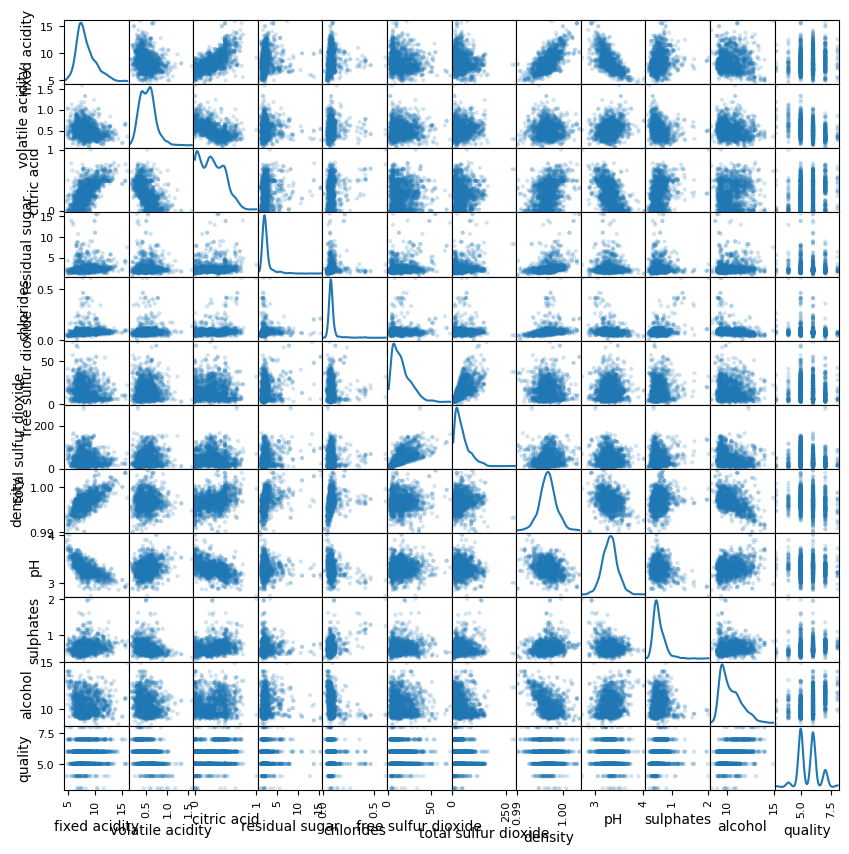

In [17]:
#From https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot
#section on scatter-plots
scatter_matrix(Wine, alpha = 0.2, figsize = (10, 10), diagonal = 'kde')

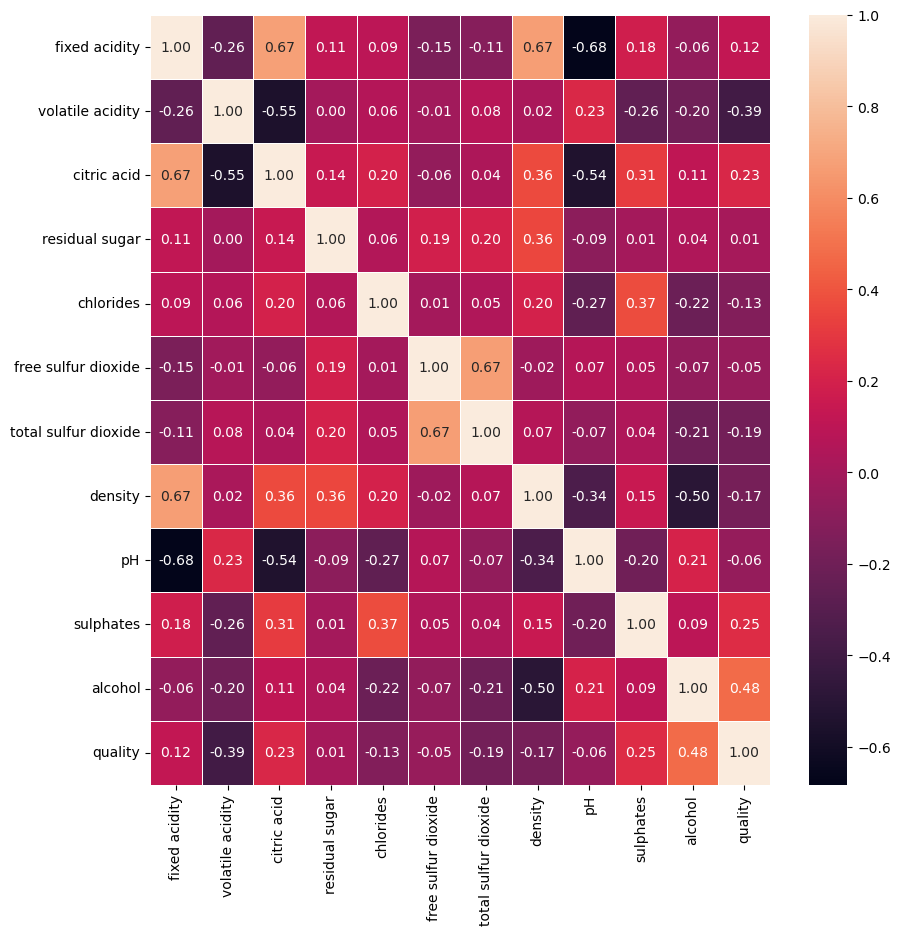

In [18]:
#Plot of correlation matrix
Wine.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(Wine.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
##Residual sugar, free sulfur dioxide and pH not very correlated with Quality. Can remove maybe???

Splitting the data into testing and training data

In [4]:
np.random.seed(seed = 2022)
X = Wine.drop(columns=['quality'])
y = Wine['quality'].values
train_index = np.random.choice([True, False], size = len(y), replace = True, p = [0.8, 0.2]) 
# random select ~80% of data into traning sample
# the rest of the samples will be in testing set.
test_index = np.invert(train_index)
X_train= X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

# SVM MODEL

Finding best parameters for SVM

In [ ]:
#Grid search to tune hyperparameters
np.random.seed(seed = 2022)
parameters_SVM = {
    "C": [0.1, 0.5,1,10,15,20,50,100],
    "kernel": ('linear', 'rbf', 'sigmoid'),
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001]   
}
SVM_best_params = GridSearchCV(SVC(), parameters_SVM)
SVM_best_params.fit(X_train,y_train)
best_params = SVM_best_params.best_params_

#seeing the best parameters
print(best_params)

In [ ]:
#Fitting the best model
np.random.seed(seed = 2022)
svm_fit = SVC(C = 1, gamma = 10, kernel = 'linear')
svm_fit.fit(X_train, y_train)
y_pred = svm_fit.predict(X_test)

#Checking Model Accuracy
print(np.mean(y_test==y_pred))
print(classification_report(y_test,y_pred))

#seeing model accuray
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

#Plotting data to see what was classified correctly
plt.figure(figsize =(10, 6))
plt.plot(y_test,'o',color = 'blue',label = 'Actual Values')
plt.plot(y_pred,color = 'red',label = 'Predicted values')
plt.legend()

# KNN MODEL

In [5]:
#Searching for best parameters for KNN using grid search
np.random.seed(seed = 2022)
parameters_KNN = {
    "n_neighbors" : [2,5,7,9,11,13,15,17,19,21,23,25,30,50],
    "weights" : ('uniform','distance'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute')  
}
KNN_best_params = GridSearchCV(KNN(n_jobs=-1), parameters_KNN)
KNN_best_params.fit(X_train,y_train)
best_params = KNN_best_params.best_params_

#finding best parameters
print(best_params)

{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}


0.6005830903790087
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.62      0.79      0.69       140
           6       0.56      0.59      0.57       135
           7       0.71      0.29      0.42        51
           8       1.00      0.25      0.40         4

    accuracy                           0.60       343
   macro avg       0.48      0.32      0.35       343
weighted avg       0.59      0.60      0.58       343

Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  0   0   7   5   0   0]
 [  0   0 110  28   2   0]
 [  0   0  51  80   4   0]
 [  0   0   8  28  15   0]
 [  0   0   0   3   0   1]]


C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


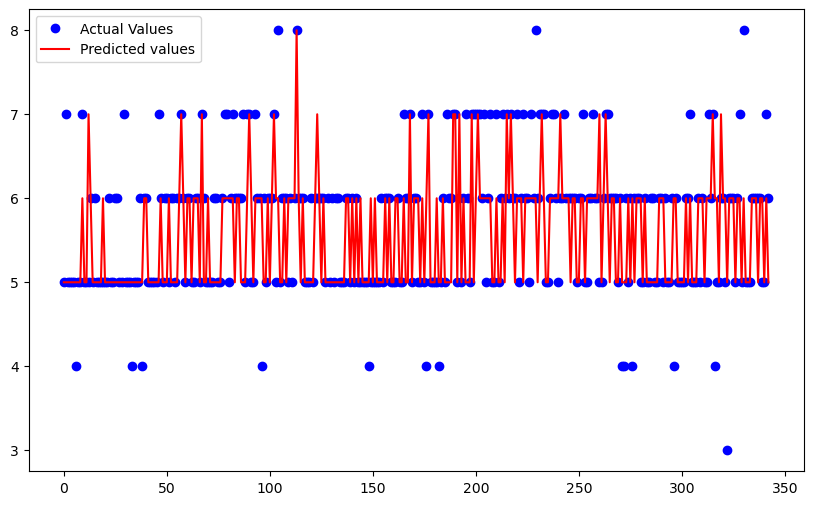

In [6]:
#results with full fit
#Fitting model with the best parameters
np.random.seed(seed = 2022)
neigh = KNN(n_neighbors= 19, algorithm ='auto',weights ='distance')
KNN_fit = neigh.fit(X_train, y_train)
y_pred=KNN_fit.predict(X_test)
X_test_prob = KNN_fit.predict_proba(X_test) 

#Checking Model Accuracy
print(np.mean(y_test==y_pred))
print(classification_report(y_test,y_pred))

#Seeing which values are classified correctly
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

#Plotting data to see what was classified correctly
plt.figure(figsize =(10, 6))
plt.plot(y_test,'o',color = 'blue',label = 'Actual Values')
plt.plot(y_pred,color = 'red',label = 'Predicted values')
plt.legend()

# Random Forest Model

In [7]:
#tuning hyperparameters using grid search
np.random.seed(seed = 2022)
parameters_RF = {
    'criterion':('gini','entropy'),
    'max_features': ('sqrt','log2'),
    'n_estimators': [100,150,200,250,300,350,400]
}
RF_best_params = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameters_RF)
RF_best_params.fit(X_train,y_train)
best_params = RF_best_params.best_params_

print(best_params)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


0.6647230320699709
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.73      0.81      0.77       140
           6       0.60      0.69      0.64       135
           7       0.72      0.41      0.53        51
           8       0.33      0.25      0.29         4

    accuracy                           0.66       343
   macro avg       0.40      0.36      0.37       343
weighted avg       0.65      0.66      0.65       343

Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  1   0   7   4   0   0]
 [  0   0 113  27   0   0]
 [  0   2  32  93   8   0]
 [  0   0   1  27  21   2]
 [  0   0   0   3   0   1]]


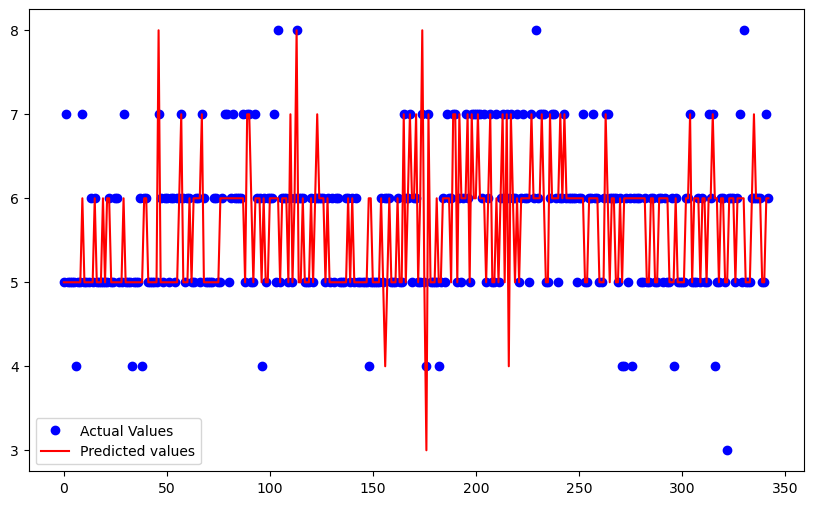

In [8]:
#results with full fit
#fitting the best model to the data
np.random.seed(seed = 2022)
RF = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', n_estimators =100)
RF_fit = RF.fit(X_train, y_train)
y_pred=RF_fit.predict(X_test)
probs = RF_fit.predict_proba(X_test)

print(np.mean(y_test==y_pred))
print(classification_report(y_test,y_pred))

#Seeing which values are classified correctly
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

#Plotting data to see what was classified correctly
plt.figure(figsize =(10, 6))
plt.plot(y_test,'o',color = 'blue',label = 'Actual Values')
plt.plot(y_pred,color = 'red',label = 'Predicted values')
plt.legend()